#Parte I

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##Importando os dados



In [2]:
def import_dados(caminho):
  dt = np.dtype(float)
  arq = np.fromfile(caminho, dtype=dt)

  ret = np.empty((0, 3), float)

  for i in range(0, len(arq), 3):
    linha = np.array([[arq[i], arq[i+1], arq[i+2]]])
    ret = np.append(ret, linha, axis=0)

  return ret

filename = '/content/drive/My Drive/dados_colab/Redes Neurais/PP2/dataAll.txt'
dados_All = import_dados(filename)

##Perceptron
Algoritmo de treinamento do perceptron

In [3]:
n = 0.1 #Taxa de aprendizado
teta = 0 #Degrau usado na função de ativação
w = np.random.uniform(-0.5, 0.5, (1, 3)) #Vetor de pesos inicial
print("Vetor inicial de pesos: {}\n".format(w[0]))

def funcao(u): #Função de ativação
  if(u >= teta):
    return 1
  else:
    return 0

i = 0
ult_indice = len(dados_All) - 1
encerrar = True
qtd_epocas = 0
total_ajustes = 0

while i <= ult_indice:
  
  if (i == 0): #Verifica a a quantidade de épocas
    qtd_epocas += 1
    print('Época: {}'.format(qtd_epocas))
  
  linha = dados_All[i]
  yd = linha[2]
  x = np.array([-1, linha[0], linha[1]])

  u = 0
  for j in range(3):
    u += (x[j] * w[-1][j])

  y = funcao(u) #Chama a função de ativação
  e = yd - y #Erro

  if (e != 0): #Há necessidade de aprendizagem
    print('Ajuste do peso: {} -> Exemplo: {}'.format(w[-1], i + 1))
    peso_novo = np.array([w[-1] + ((n * e) * x)]) #Delta
    w = np.append(w, peso_novo, axis=0) #Começa a próxima época
    encerrar = False
    total_ajustes += 1

  if (ult_indice == i): #Última linha
    print('Número de ajustes: {}'.format(total_ajustes))
    print('Vetor de pesos: ', w[-1])
    print('\n')
    if (encerrar == False):
      total_ajustes = 0
      encerrar = True
      i = -1 #Vai para o começo do array de dados

  i += 1

print('Total de ajustes: ', len(w) - 1)
print('Total de épocas: ', qtd_epocas)

Vetor inicial de pesos: [-0.06841271 -0.25540936  0.02066959]

Época: 1
Ajuste do peso: [-0.06841271 -0.25540936  0.02066959] -> Exemplo: 1
Ajuste do peso: [ 3.15872945e-02  3.61234306e+01 -2.43935604e+01] -> Exemplo: 4
Ajuste do peso: [   0.13158729  -17.53561936 -100.88931041] -> Exemplo: 8
Ajuste do peso: [ 3.15872945e-02  5.52604006e+01 -6.50597504e+01] -> Exemplo: 19
Ajuste do peso: [-6.84127055e-02  1.37859101e+02  1.47960796e+01] -> Exemplo: 27
Ajuste do peso: [ 3.15872945e-02  1.43704861e+02 -6.34985104e+01] -> Exemplo: 32
Ajuste do peso: [ 1.31587295e-01  1.03695951e+02 -1.41391200e+02] -> Exemplo: 44
Ajuste do peso: [  0.23158729 157.36576064 -92.29893041] -> Exemplo: 46
Ajuste do peso: [ 1.31587295e-01  1.04405701e+02 -1.49168390e+02] -> Exemplo: 48
Ajuste do peso: [  0.23158729 163.96522064 -99.04606041] -> Exemplo: 72
Ajuste do peso: [ 1.31587295e-01  1.18440591e+02 -1.64681990e+02] -> Exemplo: 108
Ajuste do peso: [  0.23158729 209.15645064 -89.96867041] -> Exemplo: 111
Aj

##Classes binárias
Separando os exemplos segundos os valores de yd correspondentes as classes binárias.
* O ndarray zero corresponde a classe 0.
* O ndarray um corresponde a classe 1.

In [4]:
def zero_func(dados_func):
  vet = np.empty((0,3), float)

  for x in range(len(dados_func)):
    if (dados_func[x][2] == 0):
      temp = np.array([dados_func[x]])
      vet = np.append(vet, temp, axis=0)

  return vet

def um_func(dados_func):
  vet = np.empty((0,3), float)

  for x in range(len(dados_func)):
    if (dados_func[x][2] == 1):
      temp = np.array([dados_func[x]])
      vet = np.append(vet, temp, axis=0)
  
  return vet

##Gráfico
* A cor vermelha é correspondente a classe 0 dos valores de yd.
* A cor azul é correspondente a classe 1 dos valores de yd.

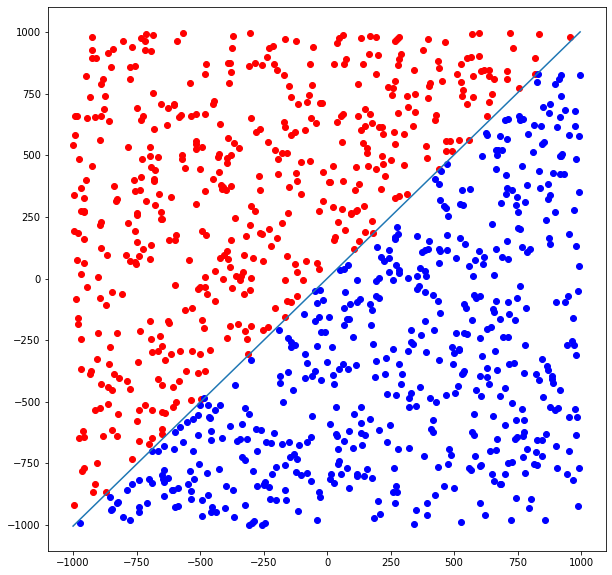

In [5]:
def intervalo_x(dados_func):
  maximo = np.max(dados_func)
  minimo = np.min(dados_func)
  intervalo = maximo - minimo

  if (intervalo > 50):
    return np.arange(minimo, maximo, 1)
  elif (intervalo > 5):
    return np.arange(minimo, maximo, 0.1)
  else: 
    return np.arange(minimo, maximo, 0.01)

peso = w[-1]
x = intervalo_x(dados_All)

zero = zero_func(dados_All)
um = um_func(dados_All)

plt.figure(figsize=(10, 10))
plt.scatter(zero[0:,0],zero[0:,1], color='red')  #vermelho
plt.scatter(um[0:,0],um[0:,1], color='blue')     #Azul
plt.plot(x, (peso[0]/peso[2]) - ((peso[1]/peso[2]) * x))
plt.show()

#Parte II - Experimentação

##Perceptron

In [6]:
qtd_execucoes = 100
n = np.array([0.4, 0.1, 0.01])                                                  #Taxa de aprendizado
I = np.array([np.array([-100, 100]), np.array([-1, 1]), np.array([-0.5, 0.5])]) #Intervalo de pesos
pesos_9 = np.empty((0,3), float)                                                #Guardando pesos para as 9 configurações
m_dp = np.empty((0, 4), float)                                                  #Matriz de média e desvio padrão

arquivo = '/content/drive/My Drive/dados_colab/Redes Neurais/PP2/data2.txt'
dados_teste = import_dados(arquivo)                                             #Importando dados

for a in range(len(n)):
  for b in range(len(I)):
    matriz_AE = np.empty((0, 2), int)

    for c in range(qtd_execucoes):

      w = np.random.uniform(I[b][0], I[b][1], (1, 3))                           #Vetor de pesos inicial

      i = 0
      ultimo_indice = len(dados_teste) - 1
      encerrar = True
      qtd_epocas = 0
      n_ajustes = 0
      total_ajustes = 0

      while i <= ultimo_indice:
    
        if (i == 0):                                                            #Verifica a a quantidade de épocas
          qtd_epocas += 1
    
        linha = dados_teste[i]
        yd = linha[2]
        x = np.array([-1, linha[0], linha[1]])

        u = 0
        for j in range(3):
          u += (x[j] * w[0][j])

        y = funcao(u)                                                           #Chama a função de ativação
        e = yd - y                                                              #Erro

        if (e != 0):                                                            #Há necessidade de aprendizagem
          w = np.array([w[0] + ((n[a] * e) * x)])                               #Delta
          encerrar = False
          n_ajustes += 1

        if (ultimo_indice == i):                                                #Última linha
          if (encerrar == False):
            total_ajustes += n_ajustes
            n_ajustes = 0
            encerrar = True
            i = -1                                                              #Vai para o começo do array de dados

        i += 1

      temp_array = np.array([[total_ajustes, qtd_epocas]])
      matriz_AE = np.append(matriz_AE, temp_array, axis=0)                      #Adiciona na matriz o total de ajustes e a quantidade de épocas

    pesos_9 = np.append(pesos_9, w, axis=0)                                     #Armazena o resultado dos pesos obtidos a cada 100 interações

    aj_media = np.mean(matriz_AE[0:,0])
    aj_desvio_padrao = np.std(matriz_AE[0:,0])
    ep_media = np.mean(matriz_AE[0:,1])
    ep_desvio_padrao = np.std(matriz_AE[0:,1])

    temp_array = np.array([[aj_media, aj_desvio_padrao, ep_media, ep_desvio_padrao]])
    m_dp = np.append(m_dp, temp_array, axis=0)                                  #Armazena média e desvio padrão das 9 configurações

##Gráfico de convergência

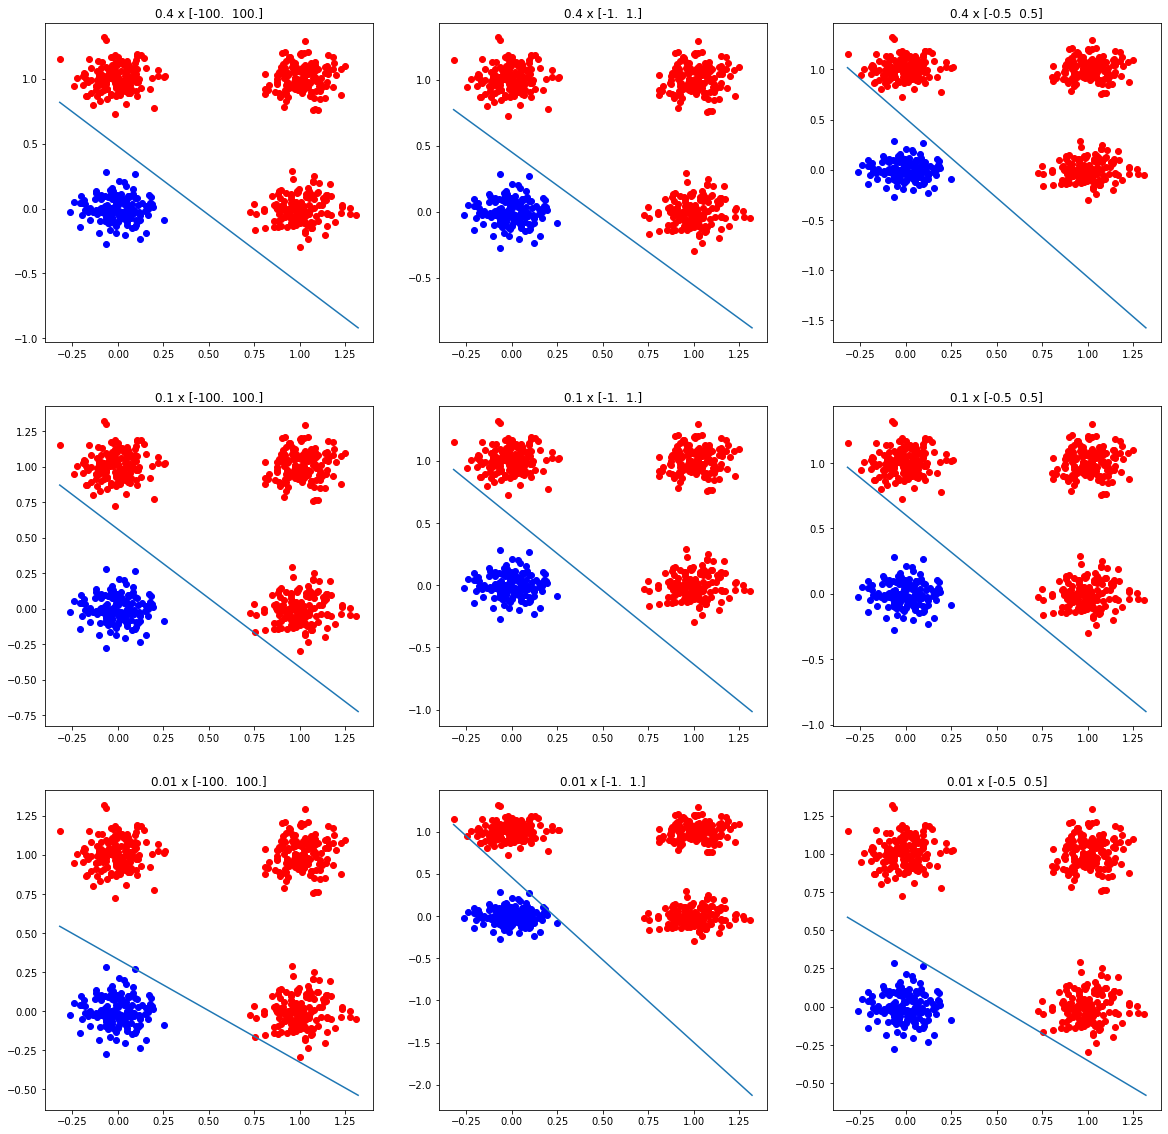

In [7]:
x = intervalo_x(dados_teste)
zero_teste = zero_func(dados_teste)
um_teste = um_func(dados_teste)

figura1, ax_1 = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

k = 0
for i in range(3):
  for j in range(3):
    peso_teste = pesos_9[k]
    ax_1[i,j].scatter(zero_teste[0:,0],zero_teste[0:,1], color='red')  #vermelho
    ax_1[i,j].scatter(um_teste[0:,0],um_teste[0:,1], color='blue')     #Azul
    ax_1[i,j].plot(x, (peso_teste[0]/peso_teste[2]) - ((peso_teste[1]/peso_teste[2]) * x))
    ax_1[i,j].set_title('{} x {}'.format(n[i],I[j]))
    k += 1

figura1.show()

##Gráfico de Média e Desvio Padrão

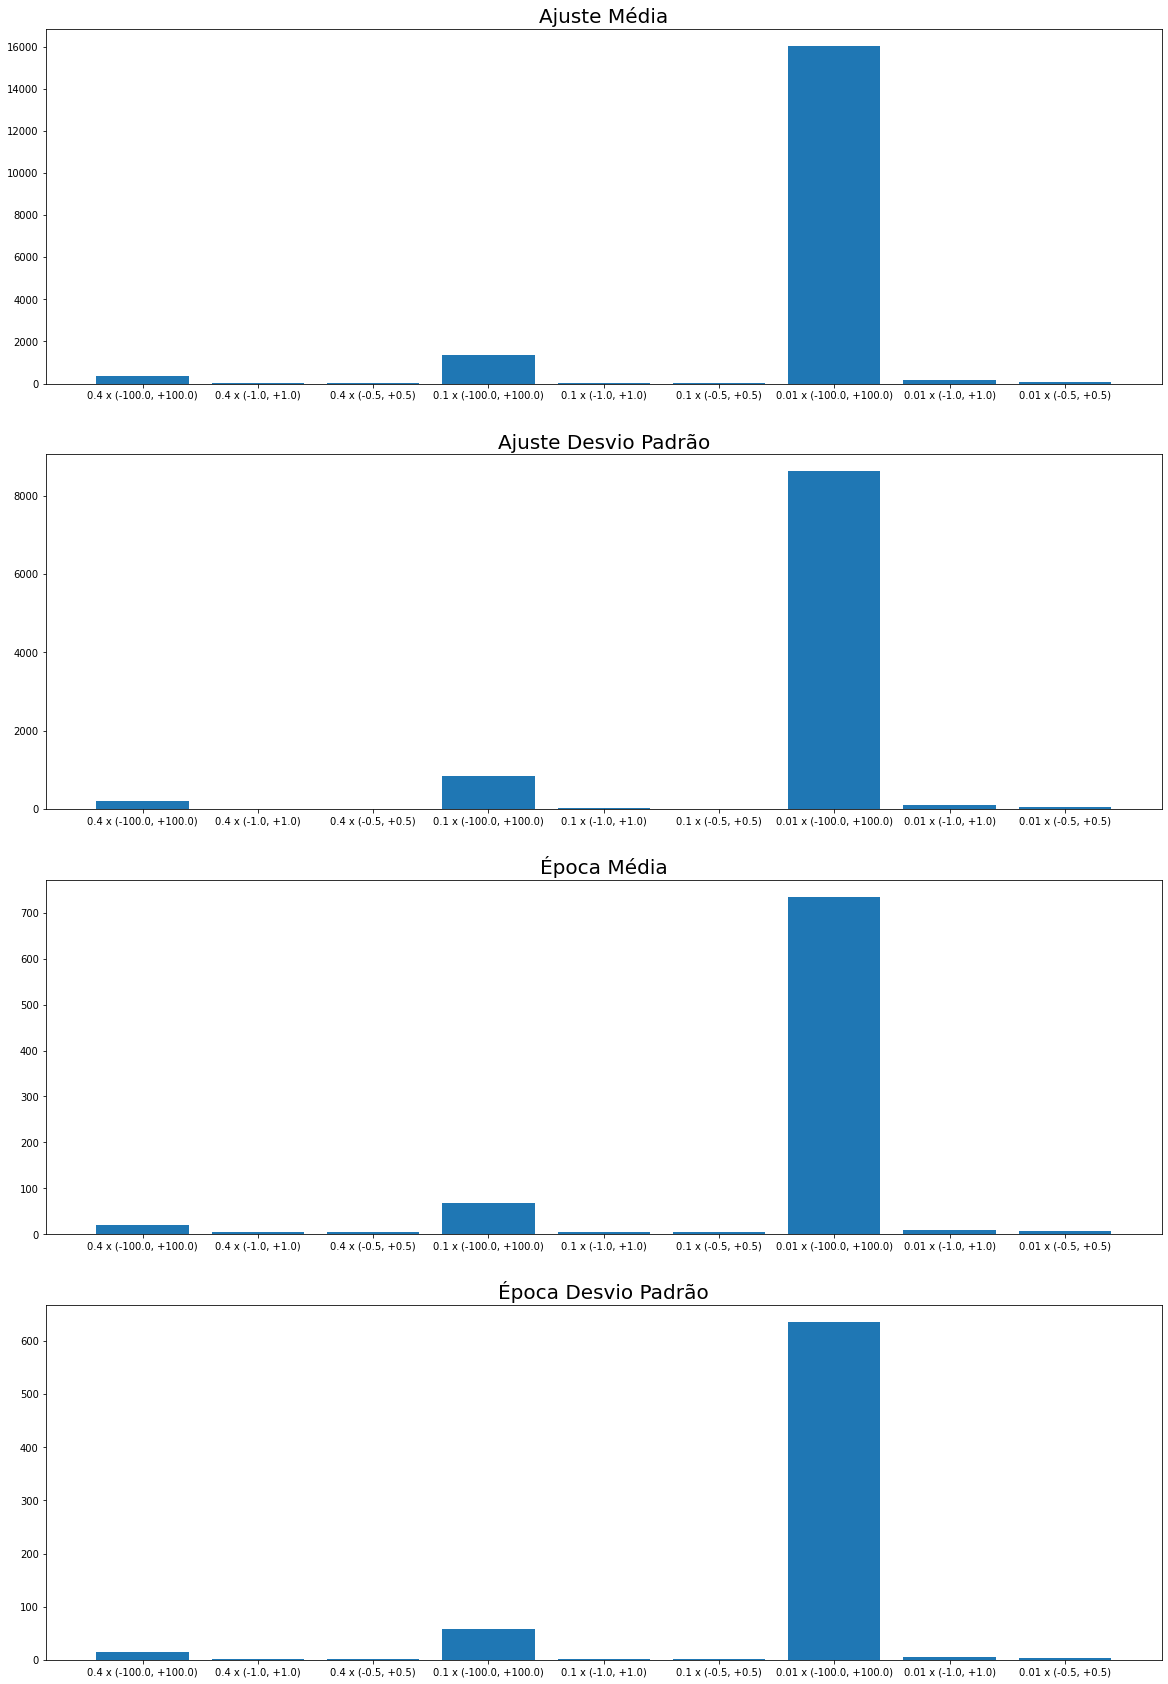

In [8]:
figura2, ax_2 = plt.subplots(nrows= 4, ncols=1, figsize=(20, 30))

titulo_ax = ['Ajuste Média', 'Ajuste Desvio Padrão', 'Época Média', 'Época Desvio Padrão']
nomes = []

for i in range(len(n)):
  for j in range(len(I)):
    nomes.append(str('{} x ({}, +{})'.format(n[i], I[j][0], I[j][1])))

for i in range(4):
  ax_2[i].bar(nomes, m_dp[0:,i])
  ax_2[i].set_title(titulo_ax[i], size=20)

figura2.show()

* A configuração "0,01 x (-100, +100)" se mostrou nitidamente a pior configuração mostrada no gráfico. Não usaria ela em hipótese alguma, pois ela demoraria bastante tempo e exigiria um poder de processamente muito avançado.
* As configurações "0,4 x (-100, +100)" e "0,1 x (-100, +100)" se mostraram intermédiárias.
* As 6 configurações restantes se mostraram muito utilizáveis.
* Conclui-se que quanto maior o intervalo de pesos e menor a taxa de aprendizado mais o algoritmo Perceptron demora para que sua execusão seja finalizada.